In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset


In [6]:
pickel_dir_path = "YOUR_PATH\\data\\pickels_v2"

means_data = pd.read_pickle(f"{pickel_dir_path}\\aggregated_car_data_2016_from_day_32_3_weeks_means.pkl")

In [7]:
means_data

,lamIds,day_indices,mean_both_directions,mean_dir_1,mean_dir_2
lamId,,,,,
1,1,32,"[4.205426356589147, 5.065217391304347, 4.78623...","[4.666666666666667, 9.333333333333334, 6.33333...","[3.0, 6.666666666666667, 7.0, 3.0, 3.333333333..."
99,99,32,"[9.713178294573643, 9.032608695652174, 8.47826...","[9.666666666666666, 7.666666666666667, 9.66666...","[15.666666666666666, 13.333333333333334, 10.33..."
102,102,32,"[4.426356589147287, 4.75, 4.634057971014492, 4...","[5.666666666666667, 6.0, 9.0, 7.33333333333333...","[3.0, 6.0, 2.3333333333333335, 8.6666666666666..."
103,103,32,"[7.1434108527131785, 7.278985507246377, 7.2028...","[7.666666666666667, 5.333333333333333, 12.0, 1...","[5.666666666666667, 10.333333333333334, 4.6666..."
104,104,32,"[5.135658914728682, 5.22463768115942, 5.003623...","[9.666666666666666, 8.666666666666666, 6.33333...","[2.0, 3.0, 4.0, 2.3333333333333335, 3.66666666..."
...,...,...,...,...,...
1603,1603,32,"[3.22093023255814, 3.3804347826086962, 2.42028...","[5.666666666666667, 8.0, 3.0, 3.33333333333333...","[3.3333333333333335, 2.0, 0.6666666666666666, ..."
1604,1604,32,"[3.8682170542635657, 3.4565217391304346, 2.847...","[6.333333333333333, 6.0, 4.666666666666667, 1....","[5.333333333333333, 3.0, 1.3333333333333333, 0..."
1605,1605,32,"[3.0426356589147288, 3.0905797101449277, 2.684...","[4.333333333333333, 4.0, 1.3333333333333333, 5...","[2.3333333333333335, 4.333333333333333, 3.6666..."


In [9]:
means_both = means_data["mean_both_directions"]

In [71]:
transformed_data = to_time_series_dataset(means_both.to_numpy())
scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(transformed_data)
ks = KShape(6)
ks.fit(scaled)

KShape(n_clusters=6)

In [76]:
y_preds = ks.predict(scaled)

In [73]:
means_data["lamIds"].values

array([   1,   99,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  114,  115,  116,  117,  118,  119,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  133,  134,  135,
        136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
        147,  149,  150,  151,  152,  153,  155,  156,  158,  159,  160,
        162,  163,  164,  165,  167,  168,  169,  175,  176,  177,  178,
        179,  184,  185,  186,  187,  188,  189,  190,  191,  192,  193,
        194,  195,  196,  197,  198,  201,  203,  204,  205,  206,  207,
        208,  209,  210,  211,  221,  223,  224,  225,  226,  227,  230,
        231,  232,  233,  234,  235,  237,  238,  239,  240,  242,  243,
        244,  245,  247,  248,  249,  251,  252,  254,  255,  257,  302,
        303,  304,  305,  306,  401,  402,  403,  404,  405,  406,  407,
        408,  409,  421,  422,  424,  425,  426,  428,  429,  430,  431,
        432,  433,  435,  436,  437,  438,  439,  4

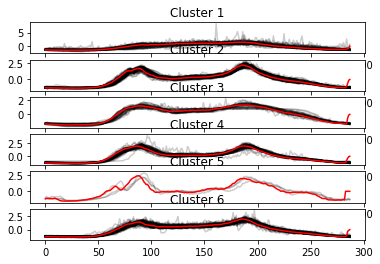

In [75]:
plt.figure()
for yi in range(6):
    plt.subplot(6, 1, 1 + yi)
    for xx in scaled[y_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
plt.show()

In [46]:
y_preds

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 4, 4, 2, 0, 4, 4,
       1, 2, 3, 2, 3, 4, 2, 3, 2, 2, 0, 2, 4, 2, 4, 2, 2, 2, 2, 3, 3, 3,
       3, 4, 3, 0, 4, 4, 3, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 1, 0, 3, 2, 2, 0,
       2, 4, 0, 0, 0, 2, 4, 3, 0, 2, 4, 2, 0, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 5, 4, 2, 3, 4, 0, 2, 4,
       0, 1, 0, 2, 4, 4, 3, 4, 2, 0, 2, 2, 2, 4, 2, 4, 4, 0, 4, 0, 3, 4,
       4, 0, 4, 4, 4, 2, 4, 4, 0, 1, 4, 4, 2, 0, 4, 2, 4, 4, 4, 5, 4, 0,
       0, 3, 3, 3, 3, 0, 2, 1, 5, 5, 0, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 4, 0, 0, 4, 0, 0, 5, 5, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 5,
       5, 0, 3, 1, 0, 3, 1, 4, 3, 3, 0, 3, 1, 1, 0, 1, 3, 1, 5, 1, 0, 0,
       5, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 2, 0, 0, 0, 4, 0, 2, 2,
       2, 1, 0, 1, 1, 0, 4, 1, 4, 3, 0, 3, 2, 1, 0, 0, 0, 0, 2, 1, 5, 0,
       0, 1, 1, 0, 1, 4, 0, 1, 0, 4, 1, 0, 2, 3, 5,

In [49]:
kms = TimeSeriesKMeans(6)
kms.fit(transformed_data)

TimeSeriesKMeans(n_clusters=6)

In [50]:
kms_preds = kms.predict(transformed_data)
kms_preds

array([4, 5, 5, 2, 5, 0, 3, 2, 5, 2, 3, 0, 5, 4, 4, 1, 2, 2, 5, 0, 0, 5,
       4, 5, 1, 4, 1, 0, 0, 1, 4, 0, 0, 0, 2, 4, 2, 2, 5, 3, 3, 1, 1, 1,
       1, 1, 1, 5, 2, 2, 2, 5, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       3, 3, 4, 4, 4, 0, 0, 5, 2, 5, 3, 5, 4, 0, 2, 3, 0, 4, 0, 5, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 3, 3, 3, 5, 3, 5, 5, 5, 3, 3, 3, 3,
       3, 3, 4, 4, 5, 4, 4, 4, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0,
       4, 0, 3, 0, 3, 0, 0, 0, 5, 4, 3, 3, 4, 2, 0, 3, 2, 5, 3, 0, 0, 3,
       0, 5, 3, 0, 2, 3, 3, 2, 5, 2, 5, 5, 2, 4, 2, 2, 3, 5, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 0, 0, 0, 4, 3, 4, 3, 3, 3, 4, 4,
       3, 4, 5, 0, 3, 5, 0, 0, 4, 0, 0, 4, 0, 5, 0, 4, 0, 0, 0, 4, 4, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 5, 4, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 5, 2, 0, 5, 5,
       3, 0, 4, 0, 0, 4, 3, 0, 0, 0, 3, 0, 0, 0, 5, 4, 0, 4, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 3, 0, 0,

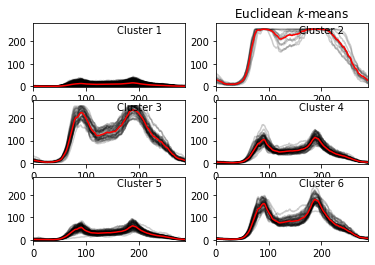

In [59]:
plt.figure()
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in transformed_data[kms_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kms.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, transformed_data.shape[1])
    plt.ylim(-4, 280)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [57]:
transformed_data[kms_preds == 1].max()

254.0

In [60]:
kms = TimeSeriesKMeans(6)
kms.fit(scaled)
kms_preds = kms.predict(scaled)
kms_preds

array([4, 4, 1, 1, 4, 4, 4, 3, 4, 3, 4, 4, 4, 0, 4, 3, 1, 1, 4, 0, 0, 1,
       0, 1, 3, 4, 3, 4, 4, 3, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 0, 4, 3, 3, 3, 3, 3, 3, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 5, 0, 5, 1, 4, 0,
       4, 4, 0, 0, 0, 4, 4, 5, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 1, 1, 5, 0, 0, 0, 0, 0, 2, 1, 4, 5, 0, 0, 4, 0,
       0, 5, 1, 4, 4, 4, 5, 0, 4, 0, 1, 4, 4, 1, 1, 4, 3, 1, 4, 0, 5, 3,
       0, 1, 1, 0, 1, 4, 1, 1, 1, 3, 1, 1, 4, 0, 1, 1, 1, 1, 1, 2, 4, 0,
       0, 5, 5, 5, 5, 0, 4, 0, 2, 2, 0, 2, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 4, 0, 0, 2, 2, 0, 2, 5, 5, 0, 5, 5, 0, 0, 0, 2,
       2, 1, 5, 5, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 2, 5, 0, 0,
       2, 0, 0, 5, 0, 0, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       4, 5, 0, 5, 5, 0, 1, 5, 0, 5, 0, 5, 4, 5, 1, 0, 0, 0, 4, 5, 2, 0,
       0, 0, 5, 0, 5, 1, 0, 5, 0, 0, 5, 0, 1, 5, 5,

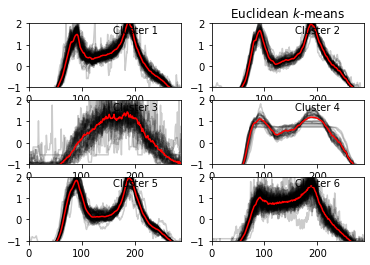

In [62]:
plt.figure()
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in scaled[kms_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kms.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, scaled.shape[1])
    plt.ylim(-1, 2)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [63]:
kms = TimeSeriesKMeans(6, metric="dtw")
kms.fit(scaled)
kms_preds = kms.predict(scaled)
kms_preds

array([2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 0, 2,
       2, 1, 3, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 3, 3, 3,
       3, 3, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 4, 2, 0, 2, 0, 0, 0, 2, 2, 5,
       5, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,

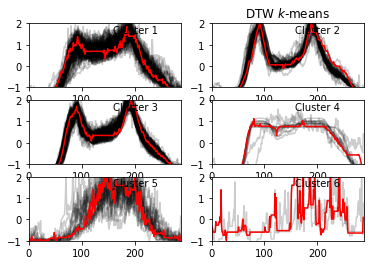

In [64]:
plt.figure()
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in scaled[kms_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kms.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, scaled.shape[1])
    plt.ylim(-1, 2)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

In [65]:
kms = TimeSeriesKMeans(3, metric="dtw")
kms.fit(scaled)
kms_3classes_preds = kms.predict(scaled)
kms_3classes_preds

array([1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0,

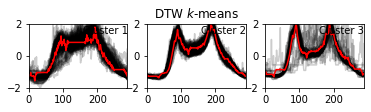

In [70]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in scaled[kms_3classes_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kms.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, scaled.shape[1])
    plt.ylim(-2, 2)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")